# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.rand(3,4)
b = torch.rand(12)
с = b.reshape(2,2,3)
a[:,0]

tensor([0.8436, 0.9384, 0.3187])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand(5,2)
b = torch.rand(1,10)
c = b.reshape(5,2)
print(f"a = {str(a)},\n b = {str(b)}, \n c = {str(c)}")

a = tensor([[0.2582, 0.6285],
        [0.3779, 0.6844],
        [0.3793, 0.7326],
        [0.6758, 0.7132],
        [0.0572, 0.8685]]),
 b = tensor([[0.9363, 0.2104, 0.4436, 0.7615, 0.1989, 0.1118, 0.2293, 0.8080, 0.1565,
         0.1635]]), 
 c = tensor([[0.9363, 0.2104],
        [0.4436, 0.7615],
        [0.1989, 0.1118],
        [0.2293, 0.8080],
        [0.1565, 0.1635]])


In [ ]:
print(f"a + c = {torch.add(a, c)}\n a - c = {torch.sub(a,c)} \n a \ c = {torch.div(a,c)}\
      \n a * c = {torch.mul(a,c)} \n a x c = {torch.mm(a,c.T)} \n \n  a % c = {torch.fmod(a,c)}")

a + c = tensor([[1.1945, 0.8389],
        [0.8215, 1.4458],
        [0.5782, 0.8444],
        [0.9051, 1.5212],
        [0.2137, 1.0320]])
 a - c = tensor([[-0.6782,  0.4181],
        [-0.0657, -0.0771],
        [ 0.1804,  0.6209],
        [ 0.4465, -0.0947],
        [-0.0993,  0.7050]]) 
 a \ c = tensor([[0.2757, 2.9868],
        [0.8520, 0.8988],
        [1.9070, 6.5551],
        [2.9475, 0.8827],
        [0.3654, 5.3108]])      
 a * c = tensor([[0.2417, 0.1323],
        [0.1677, 0.5211],
        [0.0754, 0.0819],
        [0.1550, 0.5762],
        [0.0090, 0.1420]]) 
 a x c = tensor([[0.3740, 0.5931, 0.1216, 0.5670, 0.1432],
        [0.4979, 0.6888, 0.1517, 0.6396, 0.1711],
        [0.5093, 0.7261, 0.1573, 0.6789, 0.1792],
        [0.7829, 0.8429, 0.2141, 0.7312, 0.2224],
        [0.2363, 0.6867, 0.1084, 0.7148, 0.1510]]) 
 
  a % c = tensor([[0.2582, 0.2077],
        [0.3779, 0.6844],
        [0.1804, 0.0620],
        [0.2172, 0.7132],
        [0.0572, 0.0508]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
images = torch.normal(mean = 20,std=2.5,size=(100,200,200,3)).long()
images[...] = 0
images.float().mean()

tensor(0.)

<Figure size 1008x1080 with 0 Axes>

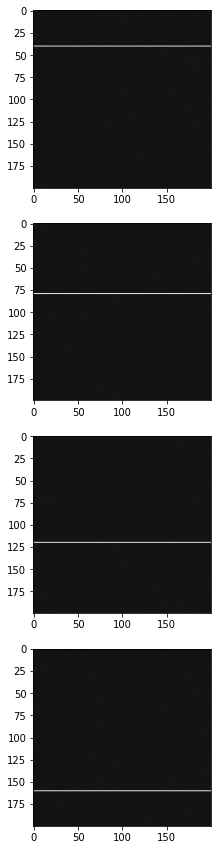

In [ ]:
plt.figure(figsize=(14, 15))
f, axarr = plt.subplots(4,1)
for idx,num in enumerate(range(20,100,20)):
  images = torch.normal(mean = 20,std=2.5,size=(100,200,200,3)).long()
  images[num,2*num:2*num+1,:,:] = 255
  axarr[idx].imshow(images[num])
f.set_size_inches(14,15)

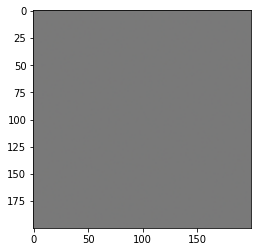

In [ ]:
images = torch.normal(mean = 122,std=2.5,size=(100,200,200,3)).long()
plt.imshow(torch.mean(images.float(),dim = 0).long())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
a = nn.init.uniform_(torch.empty(2, 3, 4),a = 0,b = 2).cuda()
b = nn.init.uniform_(torch.empty(1, 8, 3),a = 0,b = 2).cuda()
c = b.reshape(2,3,4)
c = Variable(c.cpu(),requires_grad = True)
a = Variable(a.cpu(),requires_grad = True)

In [ ]:
L = torch.mean((c - a)**2)
L.backward()

In [ ]:
c.grad.data

tensor([[[ 2.6421e-01, -3.4014e-03, -5.9645e-02, -2.1572e-01],
         [ 2.4444e-04, -2.4090e-01, -3.2848e-02, -9.8885e-02],
         [-1.7227e-01,  4.7695e-02,  1.5181e-01,  6.6787e-02]],

        [[-2.5587e-01, -1.2136e-01, -1.9399e-02, -1.0970e-01],
         [-1.1458e-01,  3.7803e-02, -1.5629e-01, -2.0051e-02],
         [-2.4698e-02, -1.0814e-01, -6.2487e-02,  7.7427e-02]]])